# College Graduate Earnings
---
*by Ian McNabb*

The purpose of this notebook is to practice using Python, specifically the pandas, matplotlib, and numpy libraries, for parsing through data and creating visualizations. This is also used as an opportunity to refamiliarize myself with Jupyter Notebooks, creating new directories using bash, etc.

*data source credit:* [The Wall Street Journal](https://www.kaggle.com/wsj/college-salaries)

**Temporary workflow/notes below (no api)**

*struggling with requesting api for data, will come back to that*
- start with parsing datafile with csv library
    - How much do engineering degrees start off making in their career? Make a bar chart comparing them
        - cannot convert string to float? Trying to convert row[1] (median salary) to float
            - SOLVED: just needed a nights rest to realize it was the '$' and the ','
        - created module 'format_salary' that returns an integer from read salary strings
        - Having problems rendering pygal graph within jupyter notebook
            - pygal seems to be out of date and not very compatible with ipython. Switched to matplotlib to make it easy
    - What is the average median starting salary for every school type (engineering, party, liberal arts, state)?
        - I realize this process would be quicker and easier in excel, but the point is to practice and learn python even if it's inefficient and using brute force at first
        - figuring out how to create a dictionary containing a list of values for each key, then traversing through it
        - using arrays from the numpy library may be a more efficient way to store and manipulate data in this situation
        - what does *zip function even do? Seems like an easy solution plotting dictionaries
            - Breaking down the code... items() method returns the dictionary as a list of tuples. "A view object that displays a list of a given dictionary's (key, value) tuple pair."
            - zip() function takes iterables (lists, tuples, dict), aggregates them in a tuple, and returns it.
            - might have something to do with positional arguments (*args). I understand that in the context of a creating a function but I still don't get what exactly it's doing here

In [35]:
import csv 
import matplotlib.pyplot as plt
from statistics import mean

# takes string in $xx,xxx.xx format and converts to integer
from format_salary import format_salary

**1. What is the median starting salary for all engineering majors?**

In [36]:
filepath = "/Users/ianmcnabb/Downloads/college-salaries/degrees-that-pay-back.csv"

with open(filepath, 'r') as f_obj:
    reader = csv.reader(f_obj)
    header_row = next(reader)
    
    salaries = []
    engineers = []
    for row in reader:
        name = row[0]
        salary = row[1]
        if 'Engineering' in name: 
            engineers.append(name)
            salaries.append(format_salary(salary))

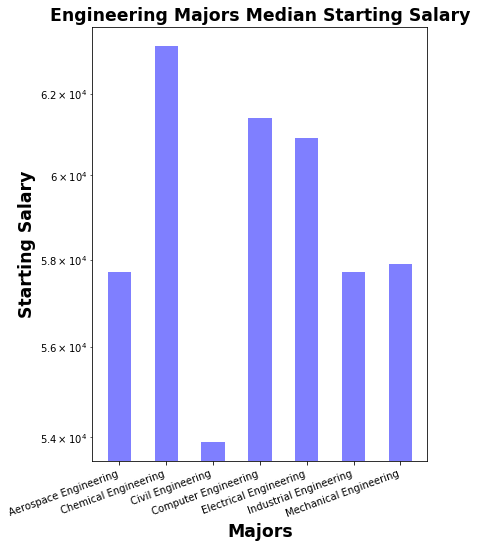

In [37]:
# create and format bar graph
plt.figure(figsize=(6.0,8.0))
plt.bar(engineers, salaries, width=0.5, bottom=0, log=True, color='b', alpha=0.5)
plt.xticks(rotation=20, horizontalalignment='right', fontsize='medium')
plt.xlabel('Majors', fontsize='xx-large', fontweight='heavy')
plt.ylabel('Starting Salary', fontsize='xx-large', fontweight='heavy')
plt.title("Engineering Majors Median Starting Salary", fontsize='xx-large', fontweight='heavy')
plt.show()

**2. What is the average median starting salary for every school type (engineering, party, liberal arts, state)?**

In [38]:
filepath = "/Users/ianmcnabb/Downloads/college-salaries/salaries-by-college-type.csv"

with open(filepath, 'r') as f_obj:
    reader = csv.reader(f_obj)
    header_row = next(reader)
    
    # initialize lists to store read salaries for each school type
    eng_salary, party_salary, lib_salary, state_salary, ivy_salary = ([] for i in range(5))
    
    # build lists
    for row in reader:
        if row[1] == school_type[0]:
            eng_salary.append(format_salary(row[2]))
        elif row[1] == school_type[1]:
            party_salary.append(format_salary(row[2]))
        elif row[1] == school_type[2]:
            lib_salary.append(format_salary(row[2]))
        elif row[1] == school_type[3]:
            state_salary.append(format_salary(row[2]))
        else:
            ivy_salary.append(format_salary(row[2]))
    
    # create dictionary with school type as keys and average median salaries as values
    my_dict = {}
    my_dict['Engineering'] = mean(eng_salary)
    my_dict['Party'] = mean(party_salary)
    my_dict['Liberal Arts'] = mean(lib_salary)
    my_dict['State'] = mean(state_salary)
    my_dict['Ivy League'] = mean(ivy_salary)
    
    print("Engineering school average median salary: " + str(round(mean(eng_salary), 2)))
    print("Party school average median salary: " + str(round(mean(party_salary), 2)))
    print("Liberal Arts school average median salary: " + str(round(mean(lib_salary), 2)))
    print("State school average median salary: " + str(round(mean(state_salary), 2)))
    print("Ivy League school average median salary: " + str(round(mean(ivy_salary), 2)))

Engineering school average median salary: 59057.89
Party school average median salary: 45715
Liberal Arts school average median salary: 45746.81
State school average median salary: 44126.29
Ivy League school average median salary: 60475


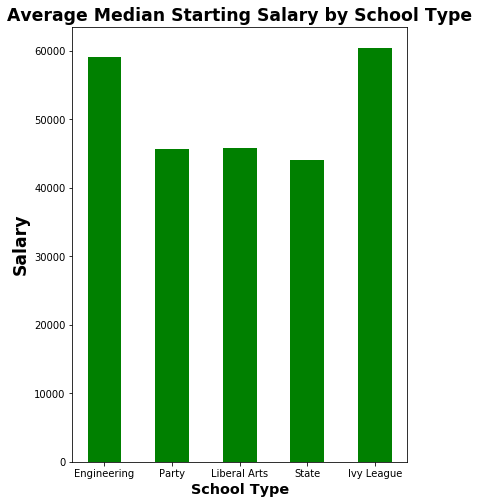

In [39]:
plt.figure(figsize=(6.0,8.0))
plt.bar(*zip(*my_dict.items()), width=0.5, color='g')
plt.xlabel('School Type', fontweight='heavy', fontsize='x-large')
plt.ylabel('Salary', fontweight='heavy', fontsize='xx-large')
plt.title('Average Median Starting Salary by School Type', fontsize='xx-large', fontweight='heavy')
plt.show()

## Pandas/NumPy Libraries
---

Now that I've learned how to use 'brute force' methods to explore data, it's time to learn how to use easier, more-efficient methods. In the realm of data science, pandas is unaminously the favorite library to use.

In [1]:
import numpy as np
import pandas as pd

In [ ]:
filepath = 

df = pd.read_csv()

### Changelog
---
    - originally planned to download data as csv, but figured it would be good practice to make an api call and download it that way. Haven't worked with APIs before. Keggle apparently has its own library?
    - This still downloads locally and I doubt others would successfully be able to run this.
    - having issues using kaggle api to download dataset
2/19/20
    - First time keeping track of daily changes to notebook
    - abondoned implimenting api for now, prioritized traversing through data and visualizing
    - second question filepath is incorrect, which is why lists are not building correctly
2/20/20
    - successfully printed the average median salary for each school type in a nice format
    - code is clunky and not clean. working to figure out how I can clean it up. also working on visualizing means
2/21/20
    - cleaned up code by removing redundant list and learning how to initialize multiple lists in one line
    - created dictionary with school type as keys and average median salaries as the paired values
    - used zip function with * positional argument to easily graph dictionary on bar chart
2/24/20
    - formatted second bar chart
    - cleaned up code, added comments
    - created a git repository and uploaded this notebook to github